# **Optical camera communications image processing for receiver**

> Python script for the image processing part of the receiver of an optical camera comuunication system.

> The objective is to demodulate a message, using on-off keying modulation/demodulation.

> The python script will import an image and try to demodulate it by image processing methods.

> The python script will be executed on a Raspberry pi 4 or a pc.

# **Necessary imports**

In [57]:
import numpy as np
import cv2
import sys
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import the image**

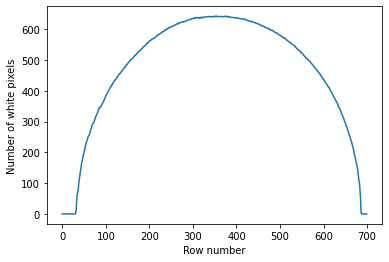

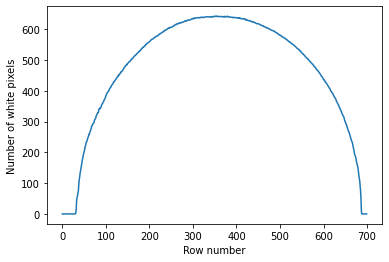

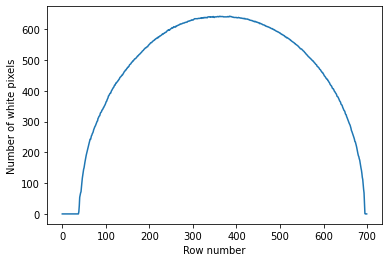

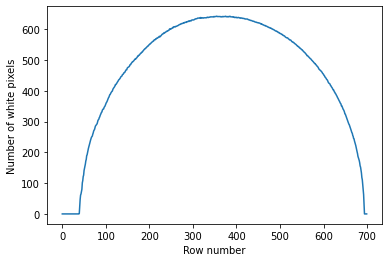

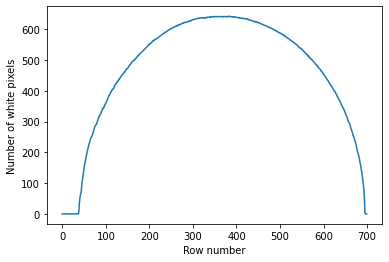

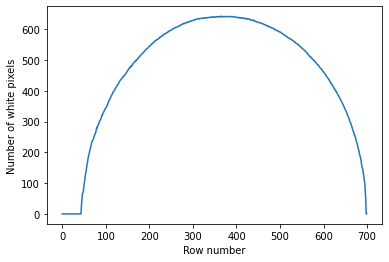

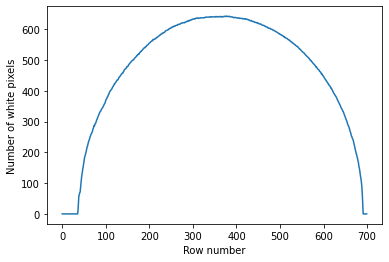

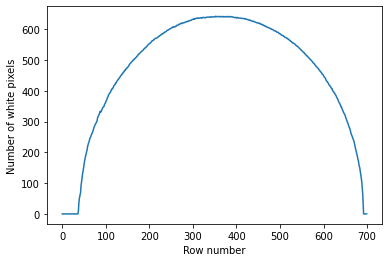

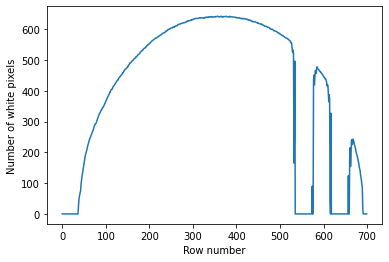

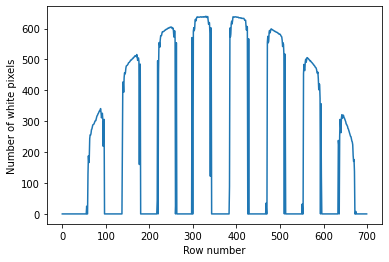

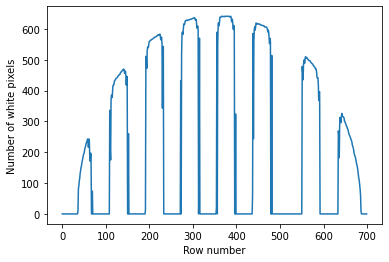

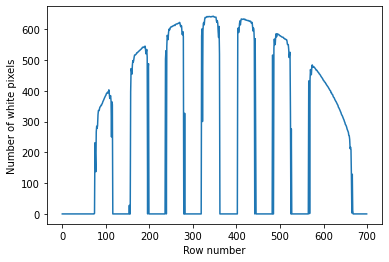

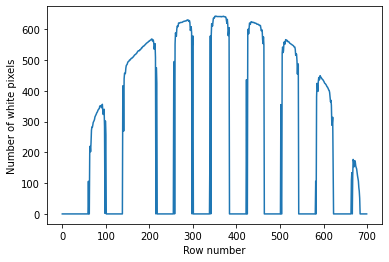

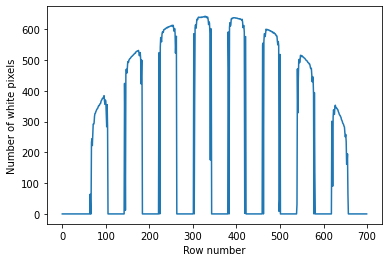

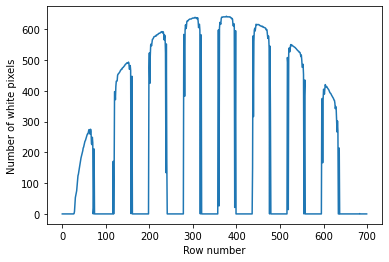

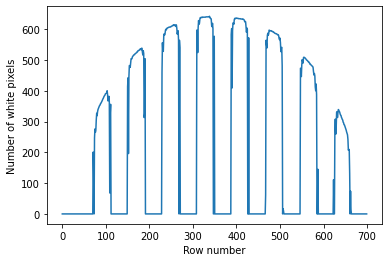

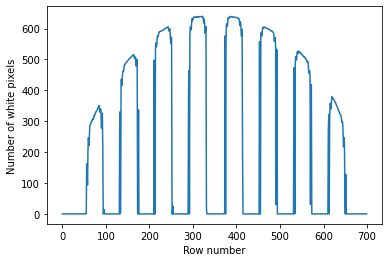

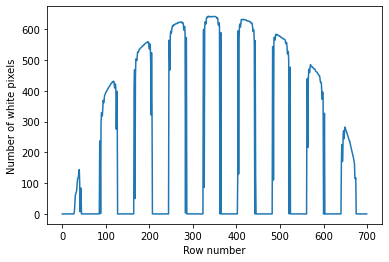

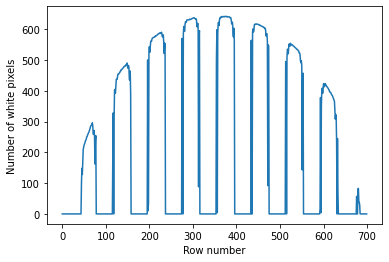

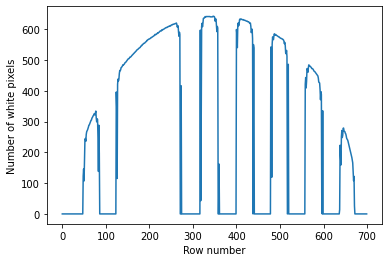

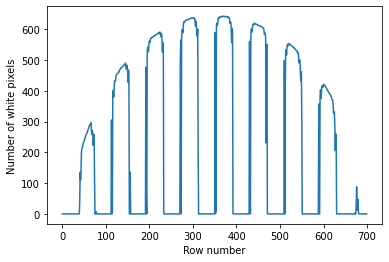

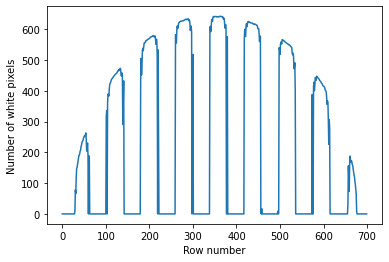

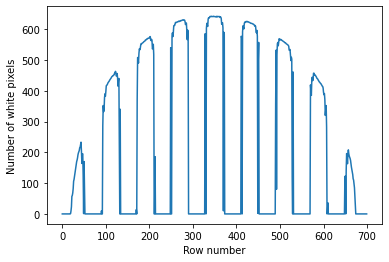

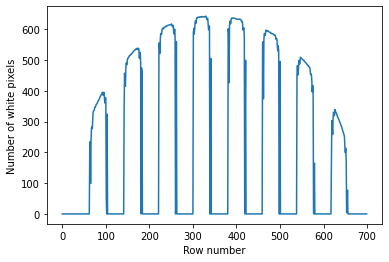

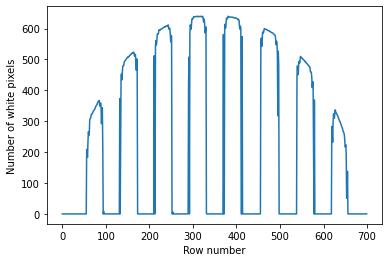

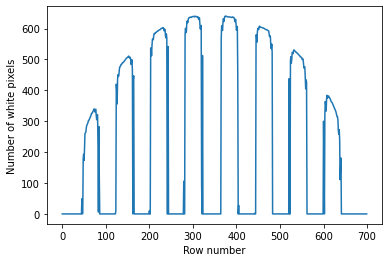

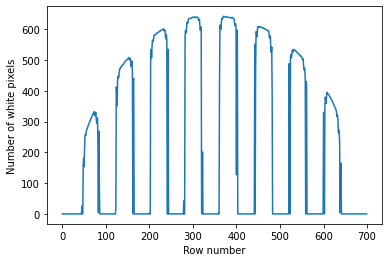

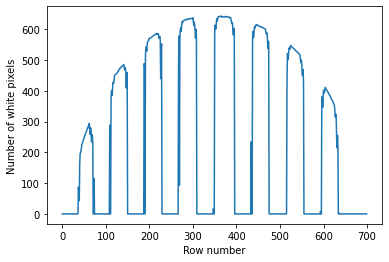

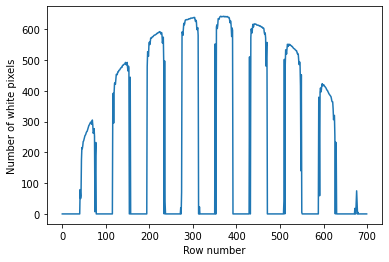

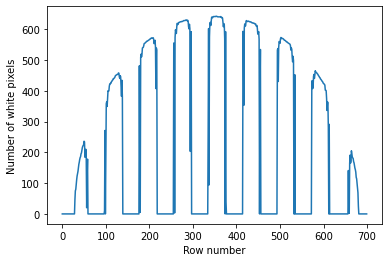

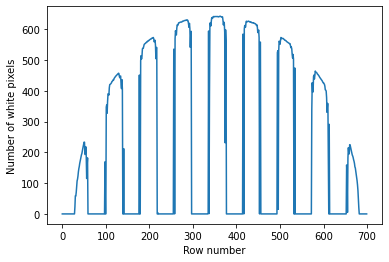

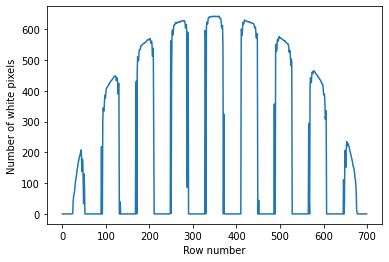

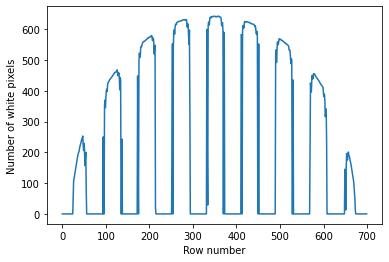

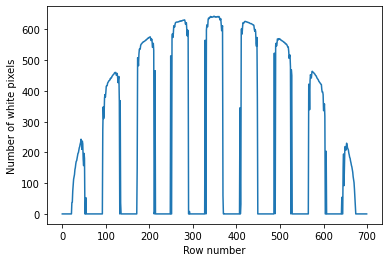

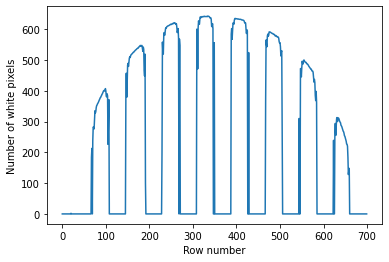

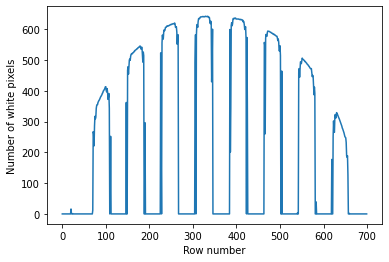

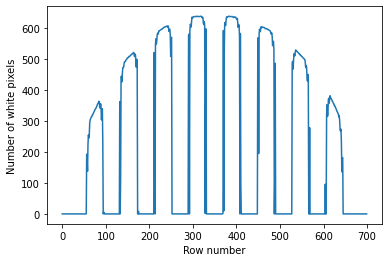

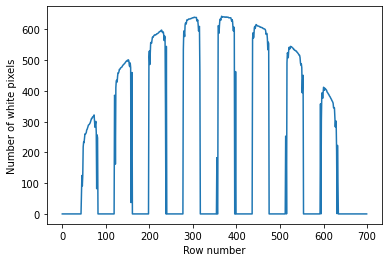

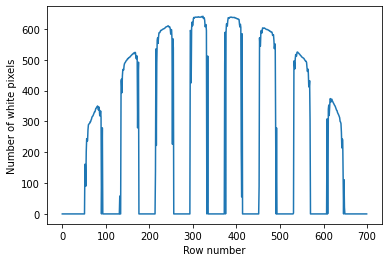

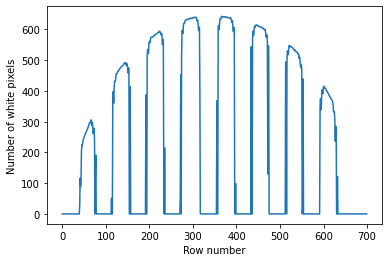

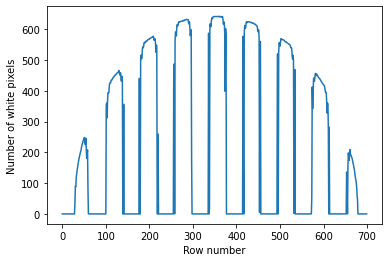

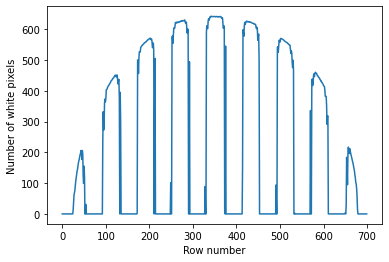

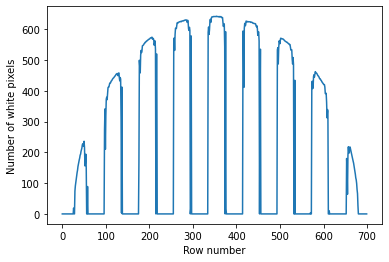

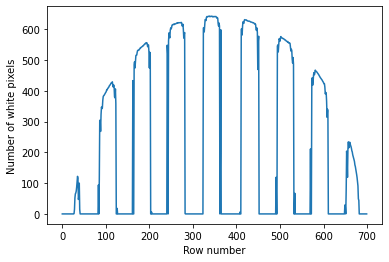

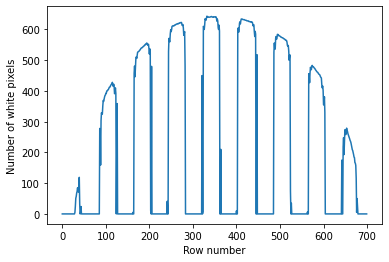

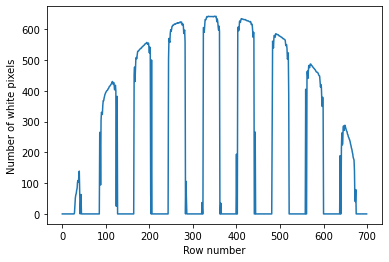

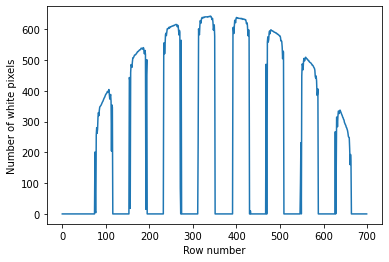

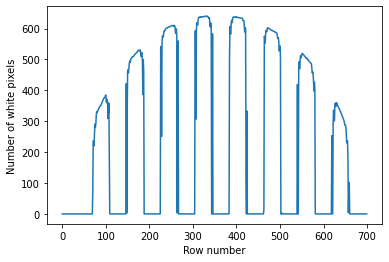

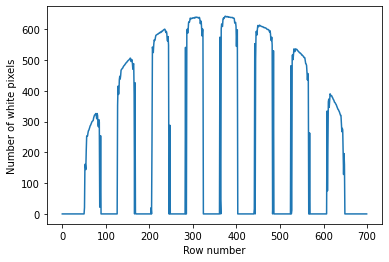

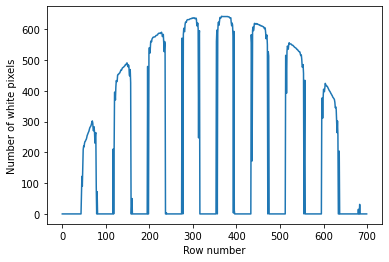

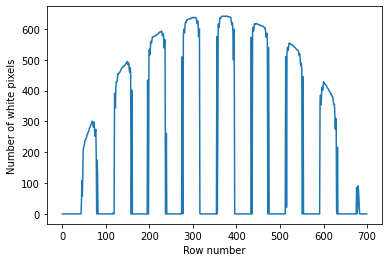

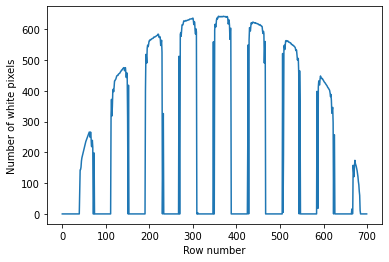

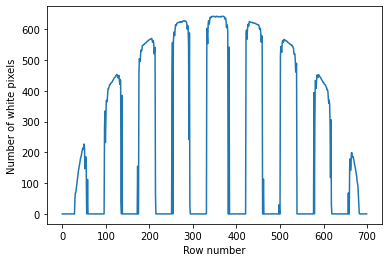

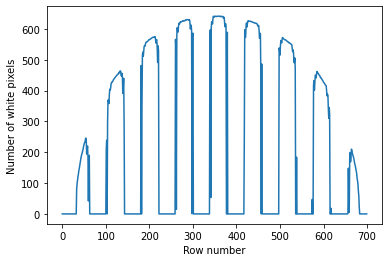

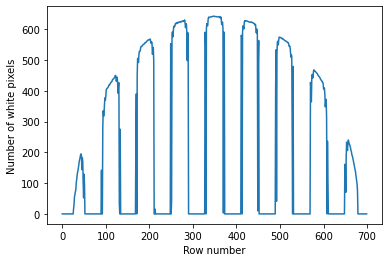

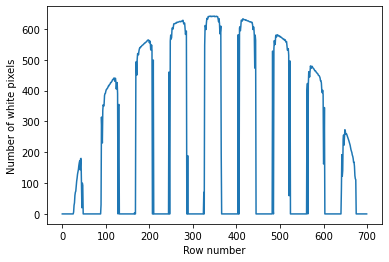

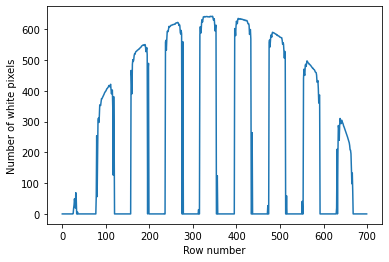

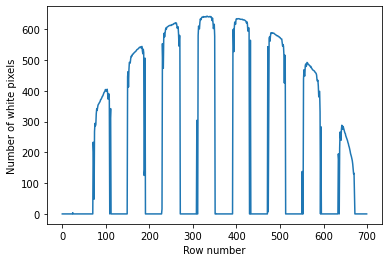

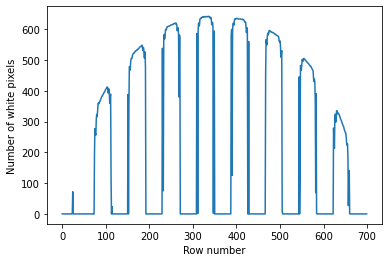

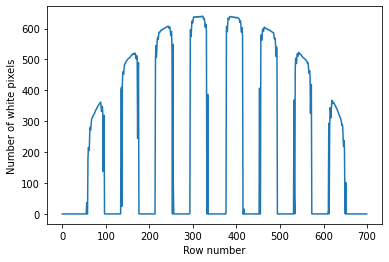

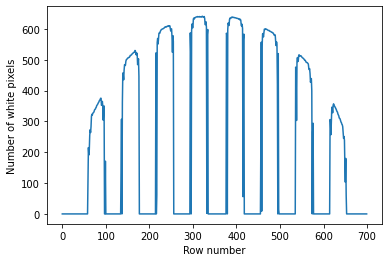

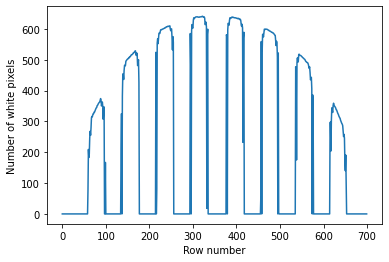

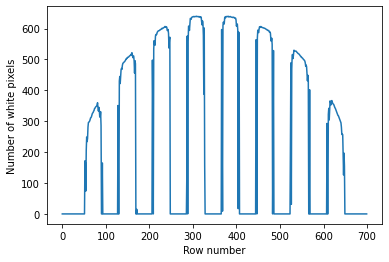

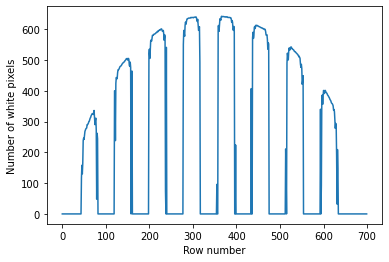

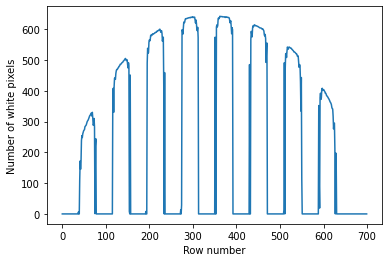

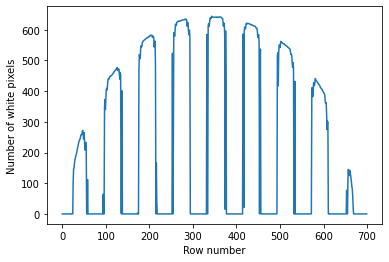

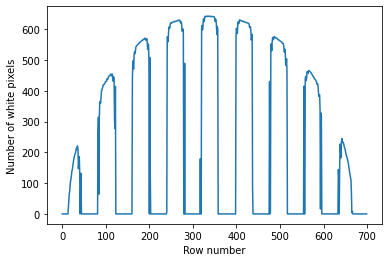

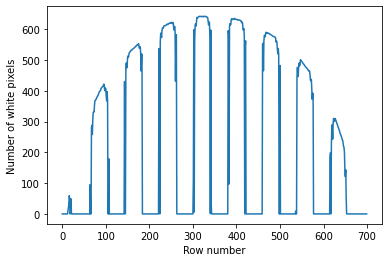

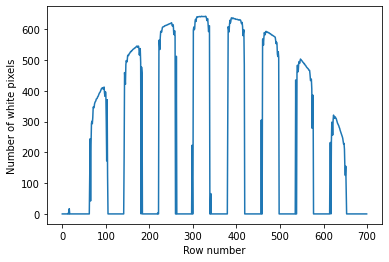

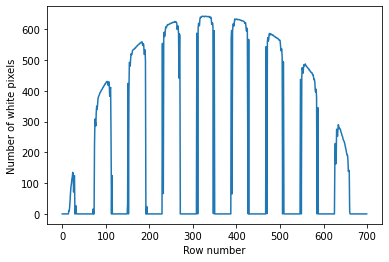

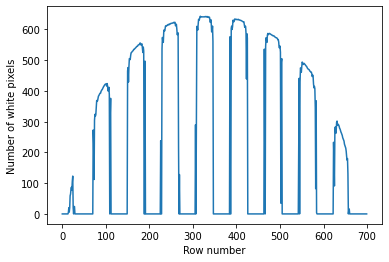

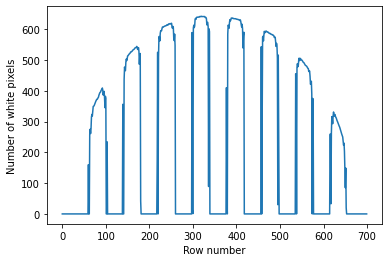

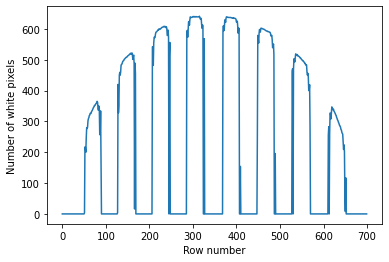

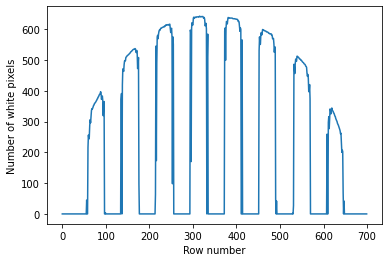

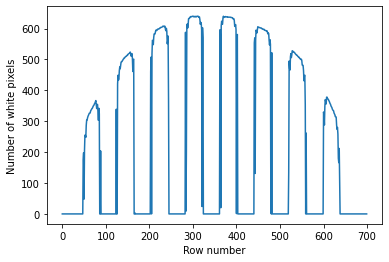

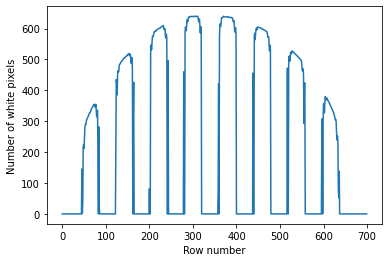

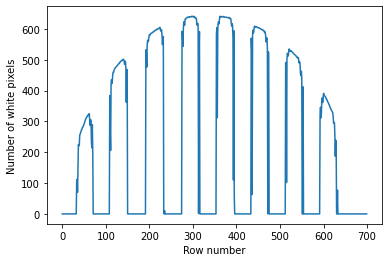

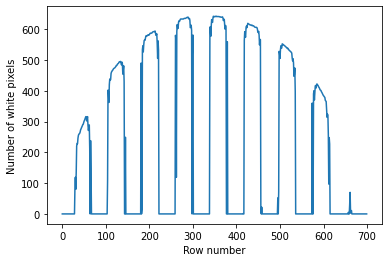

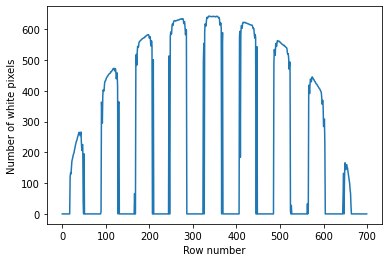

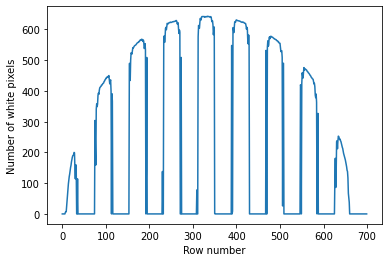

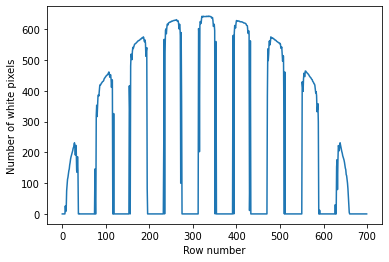

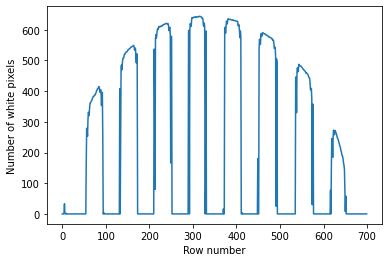

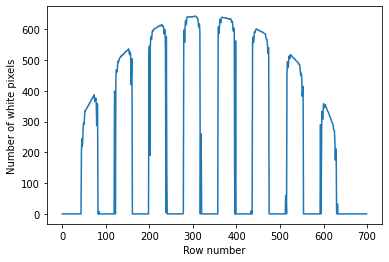

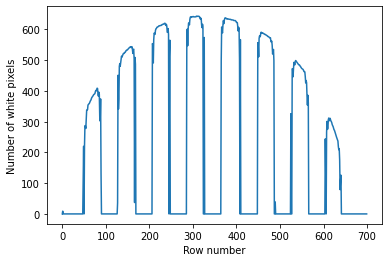

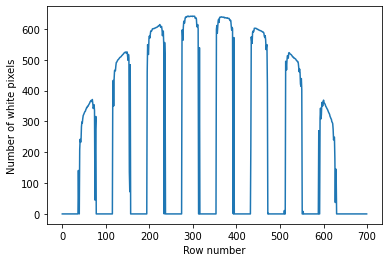

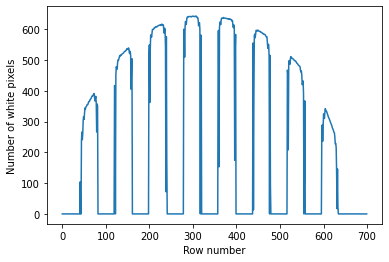

In [67]:
video_path = '/content/drive/MyDrive/auth/Diploma/Test_3_24_11_2022/MVI_5142.MP4'

# read the video
cap = cv2.VideoCapture(video_path)

if (cap.isOpened()== False):
    print("Error opening video file")

# Read until video is completed
while(cap.isOpened()):
     
# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        (thresh, bnwFrame) = cv2.threshold(grayframe, 127, 255, cv2.THRESH_BINARY)

        # counting the number of pixels
        # number_of_white_pix = np.sum(bnwFrame == 255)
        # number_of_black_pix = np.sum(bnwFrame == 0)
        # print('Number of white pixels:', number_of_white_pix)
        # print('Number of black pixels:', number_of_black_pix)

        # show useful part of the frame
        y_min = 200
        y_max = 900
        x_min = 600
        x_max = 1300
        useful_frame = bnwFrame[y_min:y_max, x_min:x_max]
        row_num = y_max - y_min
        col_num = x_max - x_min
        holder = []
        for y in range(row_num):
          row = useful_frame[y, 0:col_num-1]
          sum = np.sum(row == 255)
          holder.append(sum)
        new = np.array(holder)
        # print(holder)
        x = np.arange(1, row_num)
        # print(x)
        plt.plot(new)
        plt.ylabel('Number of white pixels')
        plt.xlabel('Row number')
        plt.show()
        # print(useful_frame.shape)
        # cv2_imshow(useful_frame)
         
    # Press Q on keyboard to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
 
# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()